In [8]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
mpki_values = {}

In [10]:
# Parsing log files for baseline and different prefetch degrees
base_dir = "../output/"
log_files = {
    "baseline": "baseline/trace2_no_no.log",  # Log with no prefetcher
    "ip-stride": "task2/trace2_ip_stride.log",
    "complex-stride": "task2/trace2_complex_stride.log"
}

In [11]:
# Function to parse a Champsim log file
def parse_champsim_log(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

        # Find IPC
        mpki_match = re.search(r'L1D LOAD\s+.*\s+MPKI:\s+([\d\.]+)', log_data)
        mpki_load = float(mpki_match.group(1)) if mpki_match else 0
        mpki_match = re.search(r'L1D TOTAL\s+.*\s+MPKI:\s+([\d\.]+)', log_data)
        mpki_total = float(mpki_match.group(1)) if mpki_match else 0

    return [mpki_load,mpki_total]

In [12]:
# Iterate through each log file and store MPKI values
for prefetcher, log_file in log_files.items():
    mpki = parse_champsim_log(base_dir + log_file)
    mpki_values[prefetcher] = mpki


In [13]:
mpki_values

{'baseline': [69.9647, 69.9934],
 'ip-stride': [16.067, 70.7358],
 'complex-stride': [9.98436, 72.0802]}

<Figure size 600x400 with 0 Axes>

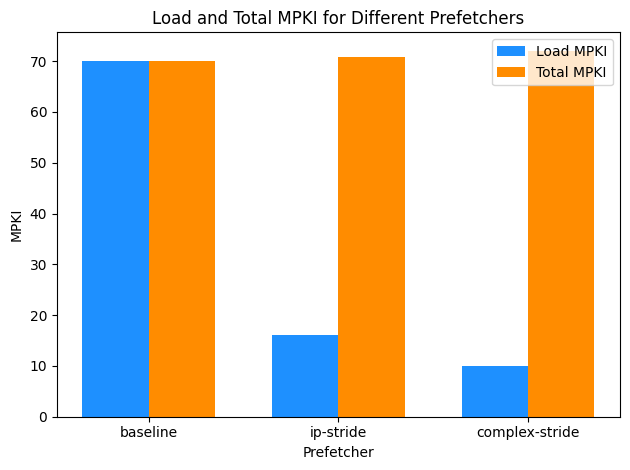

In [14]:
# Plotting graphs

# Bar plot for MPKI
plt.figure(figsize=(6, 4))
prefetchers = list(mpki_values.keys())
values = np.array(list(mpki_values.values()))

# Number of bars per group (Load MPKI and Total MPKI)
n_bars = values.shape[1]

# Set the positions and width for the bars
bar_width = 0.35
index = np.arange(len(prefetchers))

# Plotting the bars
fig, ax = plt.subplots()

bar1 = ax.bar(index, values[:, 0], bar_width, label='Load MPKI', color='dodgerblue')
bar2 = ax.bar(index + bar_width, values[:, 1], bar_width, label='Total MPKI', color='darkorange')


ax.set_xlabel('Prefetcher')
ax.set_ylabel('MPKI')
ax.set_title('Load and Total MPKI for Different Prefetchers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(prefetchers)

# Adding a legend
ax.legend()
plt.savefig("../graphs/task2-mpki.png")
# Show plot
plt.tight_layout()
plt.show()
